In [3]:
import numpy as np
import pandas
import pandas as pd
from scipy.linalg import qr, pinv, solve, norm
from numpy.random import randn
from numpy.linalg import lstsq

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
# load data
tax = pandas.read_csv("incomeTaxData.csv")
tax

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order
0,2011,Hamilton,"500,000 and over",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,13
1,2003,Dutchess,"100,000 - 199,999",NaN,12738.0,1668991.0,261775.0,16628.0,1390589.0,91652.0,87689.0,19,10
2,2001,Ontario,Total,NaN,44898.0,1829734.0,449962.0,25393.0,1354378.0,77454.0,72764.0,38,12
3,2012,New York City - Richmond,"30,000 - 39,999",NaN,16086.0,559918.0,192402.0,10519.0,356997.0,17286.0,12238.0,5,5
4,2007,Clinton,"50,000 - 59,999",NaN,2197.0,120482.0,29429.0,1649.0,89404.0,4738.0,4220.0,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,2013,Residence Unknown ++,"100,000 - 199,999",NaN,527.0,74543.0,10177.0,282.0,64083.0,4095.0,3720.0,66,10
12585,2013,Residence Unknown ++,"200,000 - 249,999",NaN,127.0,28013.0,3219.0,93.0,24702.0,1643.0,1469.0,66,11
12586,2013,Residence Unknown ++,"250,000 - 499,999",NaN,223.0,79218.0,5876.0,174.0,73168.0,4972.0,4492.0,66,12
12587,2013,Residence Unknown ++,"500,000 and over",NaN,326.0,872846.0,14092.0,290.0,858465.0,71780.0,63360.0,66,13


You can see just from the first line of the dataset that the there are some rows with no returns associated with it. Let's delete those from the dataset.

Also note that all of the data is in thousands of dollars.

In [6]:
# clean data
tax = tax.dropna(subset=['ReturnCount'])
tax = tax.sort_values(by=['Year'])

# create new columns
tax['avg_tax'] = tax['TotalTaxLiability']/tax['ReturnCount']

## a)


Plot the number of returns in Tompkins County from each income class bracket over time on a single graph.（Ignore the rows with the class of 'Total'. Should span 1999-2013. Some of the county names may have leading/trailing whitespaces.）

In [7]:
tax['County'] = tax['County'].apply(lambda x: x.strip(' '))

In [8]:
tax_tompkins = tax.loc[(tax['County']=='Tompkins') & (tax['IncomeClass']!='Total')]
tax_tompkins

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order,avg_tax
8001,1999,Tompkins,"200,000 and over",NaN,542.0,234793.0,14694.0,501.0,219597.0,15042.0,14683.0,56,11,27.090406
7135,1999,Tompkins,"5,000 - 9,999",NaN,3469.0,25638.0,21199.0,56.0,4384.0,175.0,-118.0,56,2,-0.034016
7263,1999,Tompkins,"20,000 - 29,999",NaN,4823.0,118854.0,46522.0,2345.0,69987.0,3138.0,2681.0,56,4,0.555878
9703,1999,Tompkins,"30,000 - 39,999",NaN,3380.0,117560.0,35615.0,2026.0,79919.0,3877.0,3748.0,56,5,1.108876
1005,1999,Tompkins,"100,000 - 199,999",NaN,1978.0,261304.0,35186.0,2115.0,224003.0,14663.0,14396.0,56,10,7.278059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12458,2013,Tompkins,"100,000 - 199,999",NaN,4200.0,566670.0,80246.0,3835.0,482590.0,30145.0,28790.0,56,10,6.854762
12459,2013,Tompkins,"200,000 - 249,999",NaN,533.0,118514.0,13040.0,515.0,104959.0,6982.0,6744.0,56,11,12.652908
12460,2013,Tompkins,"250,000 - 499,999",NaN,709.0,236774.0,17439.0,697.0,218638.0,14774.0,14052.0,56,12,19.819464
12449,2013,Tompkins,"Under 5,000",NaN,5214.0,-10115.0,8983.0,0.0,510.0,20.0,-534.0,56,1,-0.102417


In [30]:
tax_tompkins['IncomeClass'].unique()

array(['200,000 and over', '5,000 - 9,999', '20,000 - 29,999',
       '30,000 - 39,999', '100,000 - 199,999', '10,000 - 19,999',
       '75,000 - 99,999', 'Under 5,000', '40,000 - 49,999',
       '60,000 - 74,999', '50,000 - 59,999', '200,000 - 249,999',
       '250,000 - 499,999', '500,000 and over'], dtype=object)

In [31]:
income_class = ['Under 5,000', '5,000 - 9,999', '10,000 - 19,999', '20,000 - 29,999', '30,000 - 39,999', '40,000 - 49,999', '50,000 - 59,999', '60,000 - 74,999', '75,000 - 99,999', '100,000 - 199,999', '200,000 and over', '200,000 - 249,999', '250,000 - 499,999', '500,000 and over']

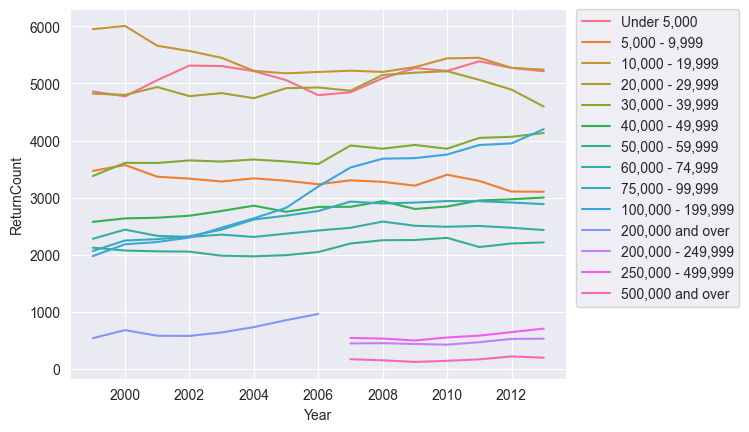

In [35]:
sns.lineplot(data=tax_tompkins, x='Year', y='ReturnCount', hue='IncomeClass', hue_order=income_class)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Plot the average income tax per return in Tompkins County (disregarding income tax).（You could add up the all income classes (except 'Total') to calculate the weighted average tax OR just plot the rows of 'Total'. The sum might differ from the number in 'total'; either answer is ok. Messy data!)

In [10]:
total_tax_tompkins = tax.loc[(tax['County']=='Tompkins') & (tax['IncomeClass']=='Total')]
total_tax_tompkins

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order,avg_tax
3531,1999,Tompkins,Total,NaN,34056.0,1420132.0,332529.0,17073.0,1070531.0,62169.0,59378.0,56,12,1.743540
11273,2000,Tompkins,Total,NaN,35038.0,1585530.0,346916.0,17193.0,1221414.0,72160.0,68998.0,56,12,1.969233
823,2001,Tompkins,Total,NaN,34758.0,1493756.0,344525.0,16956.0,1132274.0,66195.0,62816.0,56,12,1.807239
4107,2002,Tompkins,Total,NaN,34909.0,1476145.0,352804.0,16893.0,1106448.0,64478.0,60371.0,56,12,1.729382
1143,2003,Tompkins,Total,NaN,35168.0,1553294.0,361210.0,17110.0,1174966.0,71138.0,66239.0,56,12,1.883502
2886,2004,Tompkins,Total,NaN,35330.0,1695453.0,372694.0,17068.0,1305691.0,80625.0,73670.0,56,12,2.085197
5639,2005,Tompkins,Total,NaN,35570.0,1709389.0,383411.0,16967.0,1308922.0,80249.0,73653.0,56,12,2.070649
2412,2006,Tompkins,Total,NaN,35995.0,1818782.0,400061.0,16857.0,1401864.0,84378.0,75327.0,56,12,2.092707
5793,2007,Tompkins,Total,NaN,37304.0,2017698.0,419240.0,17038.0,1581421.0,96356.0,86700.0,56,14,2.324148
3628,2008,Tompkins,Total,NaN,38079.0,2087666.0,426667.0,17000.0,1664654.0,101842.0,91299.0,56,14,2.397621


<AxesSubplot: xlabel='Year', ylabel='avg_tax'>

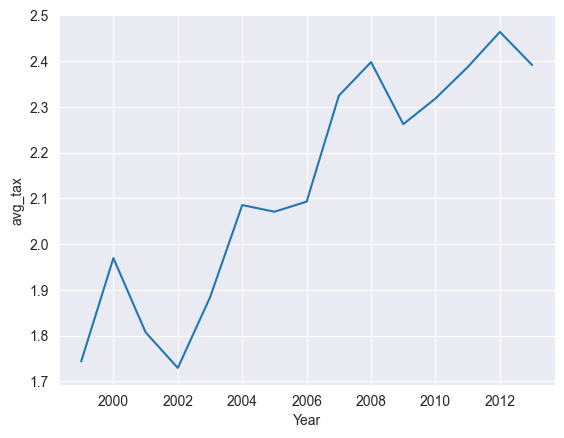

In [37]:
sns.lineplot(data=total_tax_tompkins, x='Year', y='avg_tax')

What kind of plot did you choose to make? Why?
I choose line chart because it can show the trend clearly.

## b)

Continuing to look only at Tompkins County, fit a model that predicts avg_tax using the year number. Do this with least squares.

Transform the input to include an offset term in the model

In [53]:
x = total_tax_tompkins['Year'].to_numpy()
y = total_tax_tompkins['avg_tax'].to_numpy()
x = np.concatenate([x.reshape(-1, 1), np.ones([x.shape[0], 1])], axis=1)
x

array([[1.999e+03, 1.000e+00],
       [2.000e+03, 1.000e+00],
       [2.001e+03, 1.000e+00],
       [2.002e+03, 1.000e+00],
       [2.003e+03, 1.000e+00],
       [2.004e+03, 1.000e+00],
       [2.005e+03, 1.000e+00],
       [2.006e+03, 1.000e+00],
       [2.007e+03, 1.000e+00],
       [2.008e+03, 1.000e+00],
       [2.009e+03, 1.000e+00],
       [2.010e+03, 1.000e+00],
       [2.011e+03, 1.000e+00],
       [2.012e+03, 1.000e+00],
       [2.013e+03, 1.000e+00]])

In [54]:
w_lstsq = np.linalg.lstsq(x, y, rcond=None)[0]
w_lstsq

array([ 5.27299857e-02, -1.03648049e+02])

## c)

Now we will change the feature space. Fit a model using the year and the avg_tax from the previous year (and offset).

In [30]:
x = total_tax_tompkins['Year'].to_numpy()
y = total_tax_tompkins['avg_tax'].to_numpy()
x = np.concatenate([x[1:].reshape(-1, 1), y[:-1].reshape(-1, 1), np.ones([x.shape[0]-1, 1])], axis=1)
y = y[1:]

In [31]:
w_lstsq = np.linalg.lstsq(x, y, rcond=None)[0]
w_lstsq

array([ 4.14692737e-02,  1.91075895e-01, -8.14553924e+01])

Interpret the coefficients of this. What do they mean?

Plot the real average tax return per year against your model's prediction. Discuss how you think your model fits.

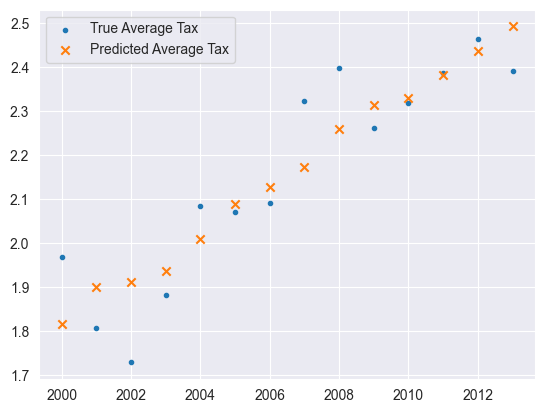

In [32]:
plt.scatter(x=x[:, 0], y=y, marker='.', label='True Average Tax')
plt.scatter(x=x[:, 0], y=x @ w_lstsq, marker='x', label='Predicted Average Tax')
plt.legend()
plt.show()

I think this model can predict the trend. However, it cannot catch the variance away from the linear trend very well.

## d)

Add two new features to your model. This could be a column of the data, a transformation of a column, or a new column formed from another. The only requirement is that the prediction in year $t$ be based on data avilable by the end of year $t-1$

State the feature space for your new model and why you think those features predict the data well. Fit this model and interpret the coefficients.

In [37]:
predictors = total_tax_tompkins.loc[:, ['TotalTaxLiability', 'TotalTaxableIncome', 'avg_tax']].iloc[:-1, :].to_numpy()
years = total_tax_tompkins['Year'][1:].to_numpy()
x1 = np.concatenate([years.reshape(-1, 1), predictors, np.ones([years.shape[0], 1])], axis=1)
x1

array([[2.00000000e+03, 5.93780000e+04, 1.07053100e+06, 1.74354005e+00,
        1.00000000e+00],
       [2.00100000e+03, 6.89980000e+04, 1.22141400e+06, 1.96923340e+00,
        1.00000000e+00],
       [2.00200000e+03, 6.28160000e+04, 1.13227400e+06, 1.80723862e+00,
        1.00000000e+00],
       [2.00300000e+03, 6.03710000e+04, 1.10644800e+06, 1.72938211e+00,
        1.00000000e+00],
       [2.00400000e+03, 6.62390000e+04, 1.17496600e+06, 1.88350205e+00,
        1.00000000e+00],
       [2.00500000e+03, 7.36700000e+04, 1.30569100e+06, 2.08519672e+00,
        1.00000000e+00],
       [2.00600000e+03, 7.36530000e+04, 1.30892200e+06, 2.07064942e+00,
        1.00000000e+00],
       [2.00700000e+03, 7.53270000e+04, 1.40186400e+06, 2.09270732e+00,
        1.00000000e+00],
       [2.00800000e+03, 8.67000000e+04, 1.58142100e+06, 2.32414754e+00,
        1.00000000e+00],
       [2.00900000e+03, 9.12990000e+04, 1.66465400e+06, 2.39762074e+00,
        1.00000000e+00],
       [2.01000000e+03, 8.6239

In [38]:
w_lstsq_1 = np.linalg.lstsq(x1, y, rcond=None)[0]
w_lstsq_1

array([ 4.85509055e-02, -2.36042569e-05,  7.44279590e-07,  5.99595913e-01,
       -9.57347426e+01])

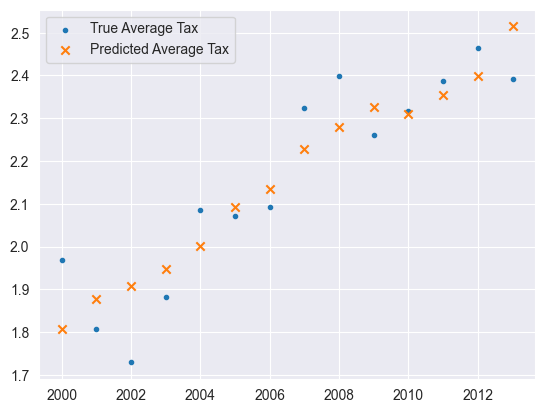

In [40]:
plt.scatter(x=x[:, 0], y=y, marker='.', label='True Average Tax')
plt.scatter(x=x[:, 0], y=x1 @ w_lstsq_1, marker='x', label='Predicted Average Tax')
plt.legend()
plt.show()

## e)

Compare the coefficients from part c and d. Does the coefficient of avg_tax differ in the two models? If so, how do you interpret this difference?

The coefficient from part c is 0.191, but the coefficient from part d is 0.599. They are noe the same. This is because the correlation between the predictors. This situation indicates that the original association between that avg_tax and the outcome variable was underestimated in the initial model, and that the additional predictors are not fully explaining that association.

## f)

(see homework handout) Now we want to see how this model performs in other counties. Apply the model you fit in part c, with coefficients $w^c$, to data from the other counties and compute the error of this model on each data set.

Plot a histogram of the mean errors the model makes.

In [69]:
def mse(y_true, y_predict):
    return np.sum((y_true - y_predict)**2) / y_true.shape[0]

In [65]:
total_tax = tax.loc[(tax['IncomeClass'] =='Total') & (~tax['County'].isin(['NYS Unclassified +', 'Residence Unknown ++', 'Grand Total, Full-Year Resident']))]

errors = {}
for county in total_tax['County'].unique():
    tmp = total_tax.loc[total_tax['County']==county]
    if tmp.shape[0] == (2013-1999+1):
        tmp.sort_values(by='Year', inplace=True)
        tmp_years = tmp['Year'][1:].to_numpy()
        tmp_avg_tax = tmp['avg_tax'].to_numpy()
        X = np.vstack([tmp_years, tmp_avg_tax[:-1], np.ones(len(tmp_years))]).T
        Y = tmp_avg_tax[1:]
        errors[county] = mse(Y, X @ w_lstsq)
err_df = pd.DataFrame({'County': errors.keys(), 'Error': errors.values()})

C:\Users\fei\AppData\Local\Temp\ipykernel_19624\3355108525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.sort_values(by='Year', inplace=True)


<AxesSubplot: xlabel='Error', ylabel='Count'>

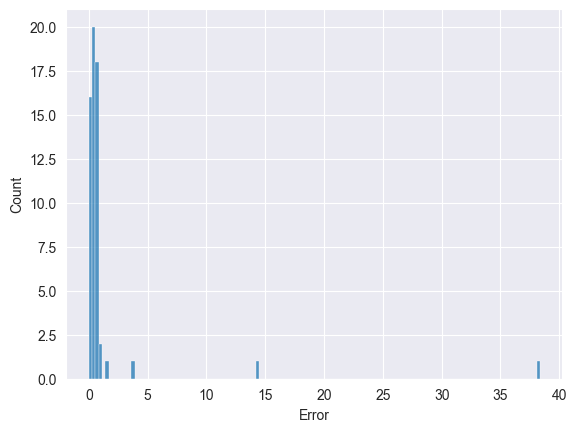

In [67]:
sns.histplot(data=err_df, x="Error")

In [70]:
mse(y, x @ w_lstsq)

0.009400598256713676

Are there major outliers?
There are four major outliers, we want to find those conties out.

In [71]:
err_df.sort_values(by='Error', ascending=False).head()

,County,Error
53,New York City - Manhattan,38.352041
16,Westchester,14.439801
4,Nassau,3.831168
55,New York City - Bronx,1.452932
9,Putnam,1.043045


New York City - Manhattan, Westchester, Nassau, New York City - Bronx are outliers who have large error.

## g)

Using the same features you chose in part d, fit a model to the data for each of the other counties. These will be county-specific models. They may have different coefficient vectors from $w^d$.

Plot a histogram of the mean square errors of the county-specific models for their respective counties.

In [85]:
err_df_1 = pd.DataFrame(columns=['County', 'Error', 'a0', 'a1', 'a2', 'a3', 'a4'])
for county in total_tax['County'].unique():
    tmp = total_tax.loc[total_tax['County']==county]
    if tmp.shape[0] == (2013-1999+1):
        tmp.sort_values(by='Year', inplace=True)
        tmp_years = tmp['Year'][1:].to_numpy()
        tmp_avg_tax = tmp['avg_tax'].to_numpy()
        predictors = tmp.loc[:, ['TotalTaxLiability', 'TotalTaxableIncome', 'avg_tax']].iloc[:-1, :].to_numpy()
        X = np.concatenate([tmp_years.reshape(-1, 1), predictors, np.ones([tmp_years.shape[0], 1])], axis=1)
        Y = tmp_avg_tax[1:]
        w_lstsq_tmp = np.linalg.lstsq(X, Y, rcond=None)[0]
        err_df_1 = err_df_1.append(pd.DataFrame([[county, mse(Y, X @ w_lstsq_tmp), *w_lstsq_tmp]],
                                                columns=['County', 'Error', 'a0', 'a1', 'a2', 'a3', 'a4']),
                                   ignore_index=True)
err_df_1.head()

,County,Error,a0,a1,a2,a3,a4
0,Franklin,0.003256,0.008942,-0.000123,3.025145e-06,1.681365,-17.511914
1,Cayuga,0.001108,0.017173,-0.000021,1.748787e-07,1.082545,-33.815819
2,Oswego,0.001004,0.013251,0.000011,2.946032e-07,-0.618342,-25.581719
3,Essex,0.004761,0.025660,-0.000002,-2.440955e-07,0.358952,-50.456681
4,Nassau,0.029705,0.075913,-0.000005,-3.302959e-08,4.036227,-150.467557


<AxesSubplot: xlabel='Error', ylabel='Count'>

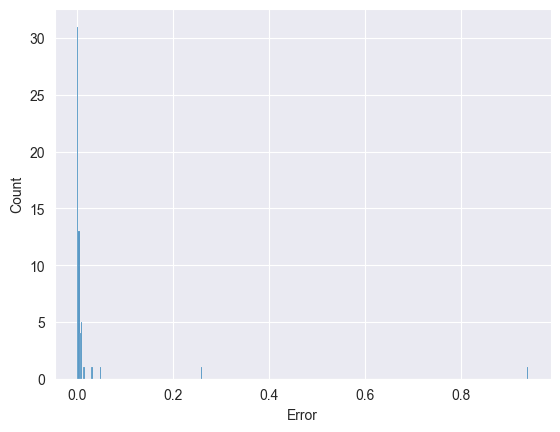

In [77]:
sns.histplot(data=err_df_1, x="Error")

In [78]:
err_df_1.sort_values(by='Error', ascending=False).head()

,County,Error
53,New York City - Manhattan,0.941172
16,Westchester,0.259406
9,Putnam,0.049108
8,Steuben,0.032868
4,Nassau,0.029705


Again, are there major outliers?

There are outliers but the difference are not as much as problem f.

<AxesSubplot: xlabel='a4', ylabel='Count'>

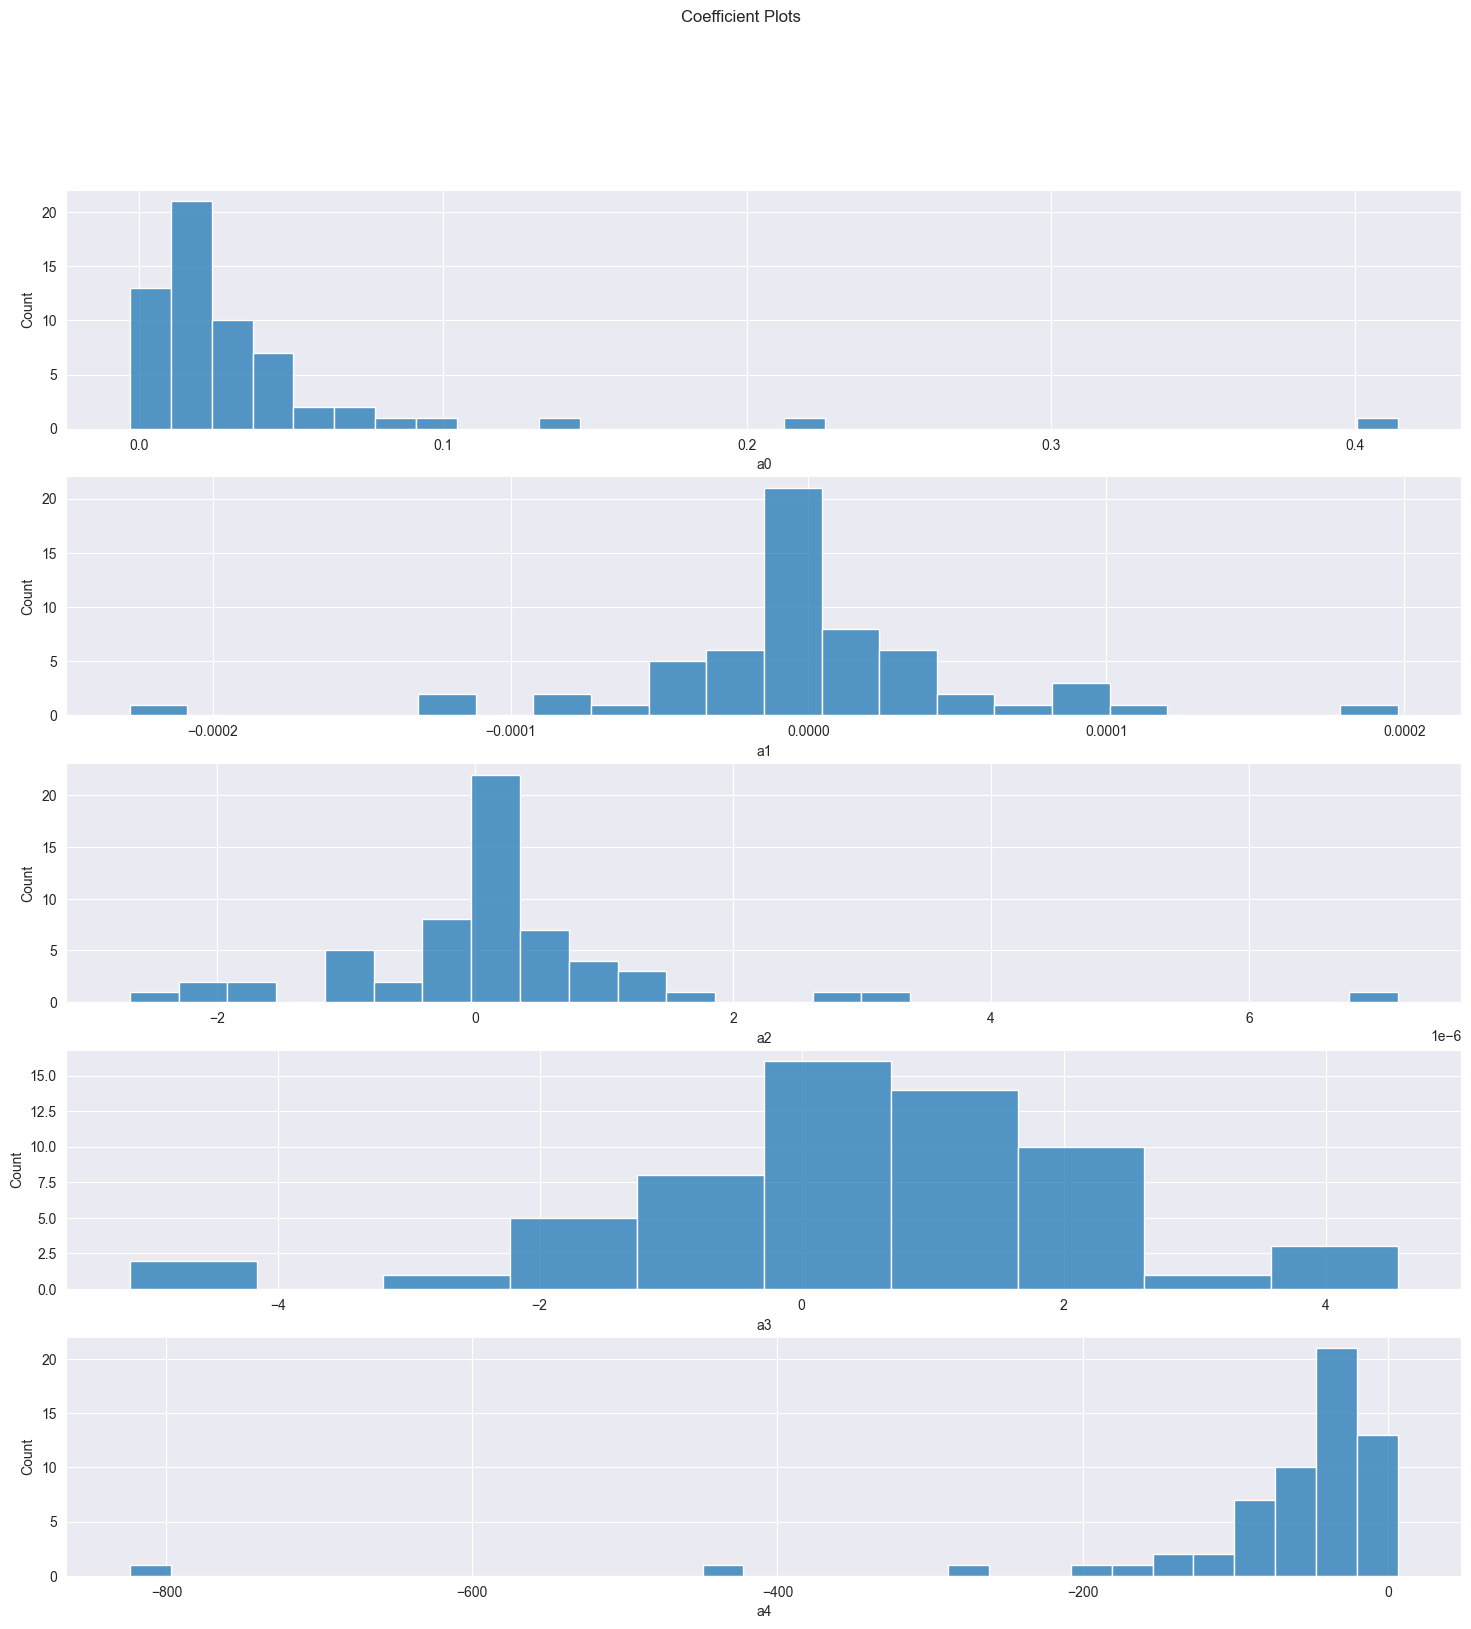

In [89]:
fig, axes = plt.subplots(5, 1, figsize=(18, 18))

fig.suptitle('Coefficient Plots')

sns.histplot(ax=axes[0], data=err_df_1, x='a0')
sns.histplot(ax=axes[1], data=err_df_1, x='a1')
sns.histplot(ax=axes[2], data=err_df_1, x='a2')
sns.histplot(ax=axes[3], data=err_df_1, x='a3')
sns.histplot(ax=axes[4], data=err_df_1, x='a4')


 How do the coefficients compare across counties?
 Most of them does not differ a lot, but we can observe several outliers from the plot above.

## h)
I would use county-specific models because they are trained using similar data. It perform better than the tompkins model.
I am concerning about whether the predictors contain enough amount of information we need to make a precise prediction. Another concern is how whether how robust is the model when dealing with abnormal situations.